# Example 2. Fisher's Linear Discriminant Analysis
---

### Main theory

The another way of feature reduction is based on **supervisor** algorithm constracted with **PCA**. The alternative veiw of classification case of machine learning can be siad reducing the *N*-dimension feature vector, $x$, to *K*-dimension class vector, $y$, by the learned coefficient matrix, $W^T$. 

$$
\begin{equation}
y=W^TX\ ,
\end{equation}
$$

where the bias is ignored, and the $W^T$ can also be called **transfer (reduction) matrix** for our purpose.  However, the distributions of the classes are usually overlap in origin hyperspace and not distiguishiable. Thus, to separate classes, the distances of the mean between the classes $\Delta m$ should be as big as possible, and the variance of each distribution within class $\sigma_k$, $(k=1,\,2,\,...,\,K)$, has to be small. 

![FishersLDADist](../doc/FishersLDADist.png)

These conditions can be presented by two scatter (covariant) square matrixes, **within-class scatter matrix $S_W$** and **between-classes scatter matrix $S_B$** in **origin hyperspace**, and a target function defined as

$$
\begin{equation}
J(W)=\frac{s_B}{s_W}=\frac{WS_BW^T}{WS_WW^T}\ ,
\end{equation}
$$

where $s_B$ and $s_W$ are the scalar factors which $W$ operates on $S_B$ and $S_W$ to **new (transfered) hyperspace**, respactively. The maximum of $J(W)$ is equivalent to find the idea solution of maximum of $s_B$ and minimum of $s_W$ in the transfered hyperspace. To obtain the maximum of $J(W)$, the correlation from first differentiation is set to zero with respect to $W$ is

$$
\begin{equation}
S_BW(W^TS_WW)-S_WW(W^TS_BW)=0\ ,
\end{equation}
$$

where uses the correlation that scalar is under transfering, $s_B=s_B^T$, $s_W=s_W^T$ and $J(W)=J(W)^T$. With a little more efforts, we can have  

$$
\begin{equation}
(S_W^{-1}S_B)W=\lambda W\ ,
\end{equation}
$$

where $\lambda=s_{w}^{-1}s_B$ is the eigenvalues of $S_W^{-1}S_B$, and it equivalent to the scalar value of target function J(W). The toppest eigenvalues can represent the maximum distinct class in transfered hyperspace. Thus, we can 
obtain the $W$ by caculating the eigenvectors of $S_W^{-1}S_B$ in origin hyperspace.

---
### Guassian distribution assumption

However, to satisfy the above correlation between origin hyperspace and transfered hyperspace in $S_B$ and $S_W$, the Guassian distribution assumption is used for all classes, then they can be defined as

$$
\begin{equation}
\begin{split}
S_W&=\sum^{K}_{k=1}{S_k}=\sum^{K}_{k=1}{\sum_{n\in C_k}^{N_k}{(X_n-M_k)(X_n-M_k)^T}}\ , \\
S_B&=\sum^{K}_{k=1}{N_k(M_k-M)(M_k-M)^T}\ ,
\end{split}
\end{equation}
$$

where $S_B$ is derived by the correlation $S_T=S_W+S_W$ (see below), $S_T$ is the total covariant matrix of dataset defined as

$$
\begin{equation}
S_T=\sum_{n}^{N}{(X_n-M)(X_n-M)^T}\ . \\
\end{equation}
$$

$N_k$ is the number of data point in $k$ class; $m$ is the mean of total data set, and $m_k$ is the mean in $k$ class, which are defined as

$$
\begin{equation}
\begin{split}
&M_k= \frac{1}{N_k}\sum_{n\in C_k}^{N_k}{X_n}\ ,\\
&M = \frac{1}{N}\sum_{n}^{N}{X_n}=\frac{1}{N}\sum_{k=1}^{K}\sum_{n\in C_k}^{N_k}{X_n}=\frac{1}{N}\sum_{k}^{N_k}{N_kM_k}\ .\\
\end{split}
\end{equation}
$$

When $W$ applies to $M$ and $M_k$, i.e. projecting to transfered hyperspace, we assume to have scalar fectors as  

$$
\begin{equation}
\begin{split}
&m = W^TM \ ,\\
&m_k = W^TM_k\ .
\end{split}
\end{equation}
$$  

Thus, the scalar factors, $s_W$ and $s_B$, can be obtained by appling $W$ to $S_W$ and $S_B$ as

$$
\begin{equation}
\begin{split}
W^TS_WW&=\sum^{K}_{k=1}{\sum_{n\in C_k}^{N_k}{W^T(X_n-M_k)(X_n-M_k)^TW}} \\
&=\sum^{K}_{k=1}{\sum_{n\in C_k}^{N_k}{(y_n-m_k)(y_n-m_k)^T}}\\
&=s_W\ ,
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
W^TS_BW&=\sum^{K}_{k=1}{N_kW^T(M_k-M)(M_k-M)^TW} \\
&=\sum^{K}_{k=1}{N_k(m_k-m)(m_k-m)^T}\\ 
&=s_B\ .
\end{split}
\end{equation}
$$

They do satisfy the correlation in the main theory's concept.

---
### Obtain $S_B$
To obtain $S_B$ for the caculation of $S_W^{-1}S_B$ in multi-classification, we have to use the correlation of $S_T=S_W+S_W$. The expension of the equations are 

$$
\begin{equation}
\begin{split}
S_T&=\sum_{n}^{N}{(X_nX_n^T-X_nM^T-M^TX_n+MM^T)} \\
S_w&=\sum_{k=1}^{K}\sum_{n\in C_k}^{N_k}{(X_nX_n^T-X_nM_k^T-M_k^TX_n+M_kM_k^T)}\ .
\end{split}
\end{equation}
$$

We replace the all the $\sum$s to $\sum_{k=1}^{K}$ by using the correlations

$$
\begin{equation}
\begin{split}
&\sum_n^{N}{X_nX_n^T}=\sum_{k=1}^{K}\sum_{n\in C_k}^{N_k}{X_nX_n^T}=\sum_{k=1}^{K}{N_k^2M_kM_k^T}\\
&\sum_{k=1}^{K}\sum_{n\in C_k}^{N_k}{M_kM_k^T}=\sum_{k=1}^{K}{N_kM_kM_k^T}\\
&\sum_{k=1}^{K}\sum_{n\in C_k}^{N_k}{X_nM_k^T}=\sum_{k=1}^{K}{N_kMM_k^T}\\
&\sum_{n}^{N}{MM^T}=\sum_{k=1}^{K}{N_kMM^T} \\
&\sum_{n}^{N}{X_nM^T}=\sum_{k=1}^{K}{N_kM_kM^T}\ .\\
\end{split}
\end{equation}
$$

Then equations of $S_W$ and $S_T$ can be simplified to


$$
\begin{equation}
\begin{split}
S_T&=\sum_{k=1}^{K}{\left[N_k^2M_kM_k^T+N_kMM^T-\left(N_kM_kM^T+N_kMM_k^T\right)\right]} \\
S_w&=\sum_{k=1}^{K}{\left[N_k^2M_kM_k^T+N_kM_kM_k^T-\left(N_kM_kM_k^T+N_kM_kM_k^T\right)\right]}\\
&=\sum_{k=1}^{K}{\left(N_k^2M_kM_k^T-N_kM_kM_k^T\right)}
\end{split}
\end{equation}
$$

By implementing above simplied equations to $S_B=S_T-S_W$, and canceling the both first terms of $S_T$ and $S_W$, $S_B$ can be obtained


$$
\begin{equation}
\begin{split}
S_B&=\sum_{k=1}^{K}{N_k\left(M_kM_k^T-M_kM^T-MM_k^T+MM^T\right)} \\
&=\sum_{k=1}^{K}{N_k(M_k-M)(M_k-M)^T}\ .
\end{split}
\end{equation}
$$

### Import packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_decision_regions import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanolds,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 1. By Numpy

#### 1.1. Means of classies $M_k$

In [3]:
np.set_printoptions(precision=4) # set printed float digit 
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print 'MV %s: %s\n'%( label, mean_vecs[label-1] )

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



##### 1.2. Scatter (convariance) matrix of witin-classes $S_W$

$$
\begin{equation}
S_W=\sum_{k=1}^{K}\sum_{n\in C_k}^{N_k}{(X_n-M_k)(X_n-M_k)^T}
\end{equation}
$$

In [4]:
# Standard way
d = 13 # number of features
S_W = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter #S_W += class_scatter/np.bincount(y_train)[label] # nomalization by each type
    
print 'Within-class scatter matrix: %sx%s'%(S_W.shape[0], S_W.shape[1])
print 'Class label distribution: %s'%(np.bincount(y_train)[1:])

Within-class scatter matrix: 13x13
Class label distribution: [40 49 35]


Since the distribution of data type is not uniform, so we must nomalize the **scatter matrix of categories** to unit. Then it is equivalent to **covariance matrix** as

$$
\begin{equation}
\begin{split}
S_{W,\,nom}=\sum_{k=1}^{k}\frac{S_k}{N_k}
&=\sum_{k=1}^{K}{\sum_{n\in C_k}^{N_k}{\frac{(X_n-M_k)(X_n-M_k)^T}{N_k}}} \\
&=\sum_{k=1}^{K}\sigma_k \\
&=\sigma_W\ .
\end{split}
\end{equation}
$$

In [5]:
# Equivalent simply way
d = 13 # number of features
S_W = np.zeros((d, d))
for label in range(1, 4):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print 'Scaled within-class scatter matrix: %sx%s'%(S_W.shape[0], S_W.shape[1])

Scaled within-class scatter matrix: 13x13


##### 1.3. Scatter matrix between classes $S_B$

$$
\begin{equation}
S_{B}=\sum_{k=1}^{K}{N_k(M_k-M)(M_k-M)^T}\ ,
\end{equation}
$$

where $m$ is the mean of total data. However, $m$ is zero for standarded data.

In [6]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print 'Between-class scatter matrix: %sx%s'%(S_B.shape[0], S_B.shape[1])
#mean_overall

Between-class scatter matrix: 13x13


##### 1.4. Eigen values and vactors of $S_W^{-1}S_B$

In [7]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print 'Eigenvalues in decreasing order: \n'
for eigen_val in eigen_pairs:
    print eigen_val[0]

Eigenvalues in decreasing order: 

452.721581245
156.43636122
7.05575044266e-14
5.68434188608e-14
3.41129233161e-14
3.40797229523e-14
3.40797229523e-14
1.16775565372e-14
1.16775565372e-14
8.59477909861e-15
8.59477909861e-15
4.24523361436e-15
2.6858909629e-15


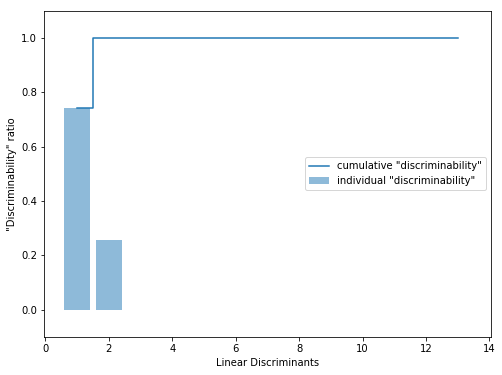

In [8]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.figure(figsize=(8,6))
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

Compare to [PCA](example_01_PCA.ipynb), the eigenvalue of **LDA** is much distiguishable and significant if the data can be projected to a line of an eigenspace, since **LDA** is supervisor algorithm but **PCA** is unsupervisor.

##### 1.5. Linear transform matrix $W$

In [9]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))
print 'Matrix W:\n', w

Matrix W:
[[-0.0662 -0.3797]
 [ 0.0386 -0.2206]
 [-0.0217 -0.3816]
 [ 0.184   0.3018]
 [-0.0034  0.0141]
 [ 0.2326  0.0234]
 [-0.7747  0.1869]
 [-0.0811  0.0696]
 [ 0.0875  0.1796]
 [ 0.185  -0.284 ]
 [-0.066   0.2349]
 [-0.3805  0.073 ]
 [-0.3285 -0.5971]]


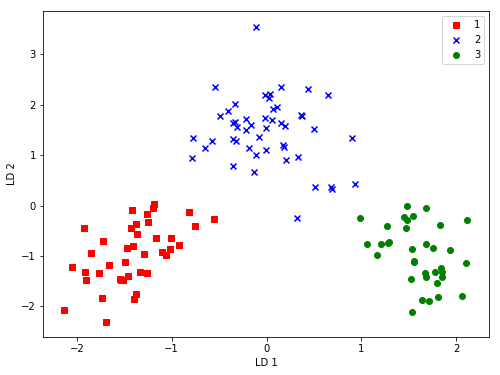

In [10]:
X_train_lda = X_train_std.dot(w)
colors  = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

plt.figure(figsize=(8,6))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.show()

### 2. By Scikit-learn & validation

In [11]:
#from sklearn.lda import LDA
#lda = LDA(n_components=2)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

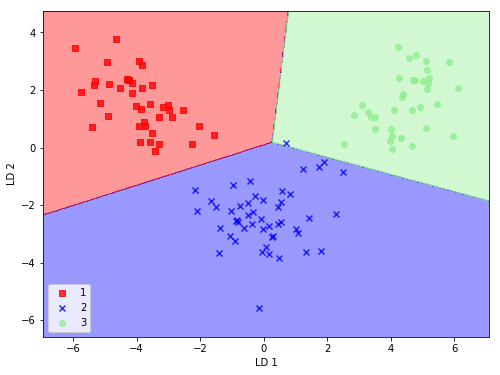

In [13]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

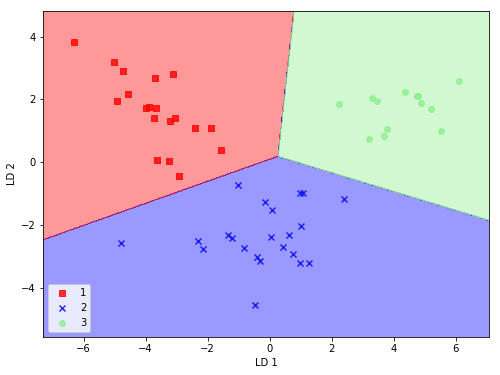

In [14]:
X_test_lda = lda.transform(X_test_std)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()